In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('advertising.csv')

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
abs(df.corr(numeric_only=True)["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [13]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df[['Sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [[0.04472952 0.18919505 0.00276111]]
Intercept: [2.97906734]


In [23]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.781599661533451
R^2 Score: 0.8994380241009119


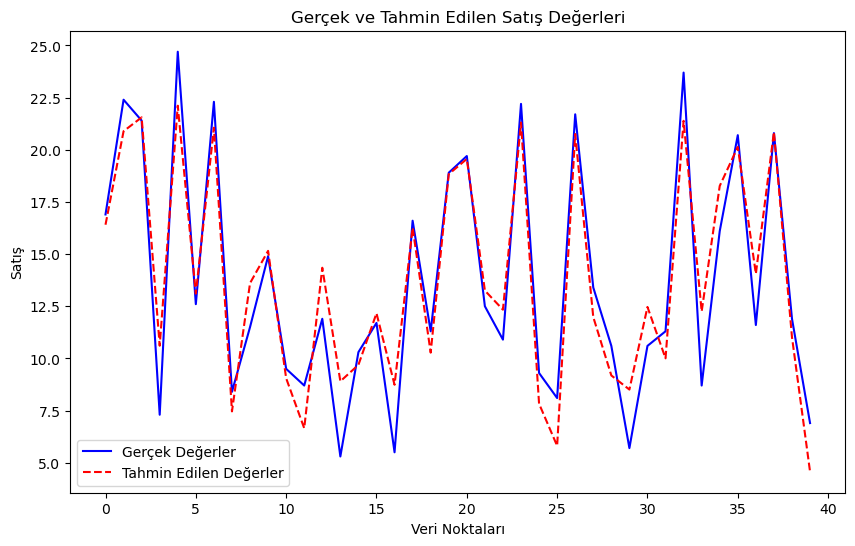

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Gerçek Değerler', color='b')
plt.plot(y_pred, label='Tahmin Edilen Değerler', color='r', linestyle='dashed')
plt.title('Gerçek ve Tahmin Edilen Satış Değerleri')
plt.xlabel('Veri Noktaları')
plt.ylabel('Satış')
plt.legend()
plt.show()